# Import needed libraries

In [76]:
import pandas as pd
import numpy as np
import gc
# import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

### Loading all the input data at once and storing it in a dict: data{}

In [77]:
files = {
    "application_train": '/home/phanh/fenh/minh/dataset64/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_train.csv',
    "application_test": '/home/phanh/fenh/minh/dataset64/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_test.csv',
    "bureau": '/home/phanh/fenh/minh/dataset64/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_bureau.csv',
    "bureau_balance": '/home/phanh/fenh/minh/dataset64/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_bureau_balance.csv',
    "previous_application": '/home/phanh/fenh/minh/dataset64/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_previous_application.csv',
    "POS_CASH_balance": '/home/phanh/fenh/minh/dataset64/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_POS_CASH_balance.csv',
    "installments_payments": '/home/phanh/fenh/minh/dataset64/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_credit_card_balance.csv',
    "credit_card_balance": '/home/phanh/fenh/minh/dataset64/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_credit_card_balance.csv'
}

# Load all files into a dictionary
data = {}
for key, file in files.items():
    data[key] = pd.read_csv(file)
    print(f"{key} shape: {data[key].shape}")

application_train shape: (246009, 123)
application_test shape: (61502, 122)
bureau shape: (1465325, 17)
bureau_balance shape: (27299925, 3)
previous_application shape: (1413701, 37)
POS_CASH_balance shape: (8543375, 8)
installments_payments shape: (3227965, 23)
credit_card_balance shape: (3227965, 23)


In [78]:
data['application_train'].drop(columns = 'Unnamed: 0', inplace = True)
data['application_test'].drop(columns = 'Unnamed: 0', inplace = True)

### Checking dtypes and the corresponding dtypes for all the datasets. We have int, float and objects

In [79]:
# Function to print unique data types
def print_dtypes(df, dataset_name):
    print(f"\nUnique data types in {dataset_name}:")
    print(df.dtypes.value_counts())
    
# Find the data types present in all datasets
for key in data.keys():
    print_dtypes(data[key], key)


Unique data types in application_train:
float64    65
int64      41
object     16
Name: count, dtype: int64

Unique data types in application_test:
float64    65
int64      40
object     16
Name: count, dtype: int64

Unique data types in bureau:
float64    8
int64      6
object     3
Name: count, dtype: int64

Unique data types in bureau_balance:
int64     2
object    1
Name: count, dtype: int64

Unique data types in previous_application:
object     16
float64    15
int64       6
Name: count, dtype: int64

Unique data types in POS_CASH_balance:
int64      5
float64    2
object     1
Name: count, dtype: int64

Unique data types in installments_payments:
float64    15
int64       7
object      1
Name: count, dtype: int64

Unique data types in credit_card_balance:
float64    15
int64       7
object      1
Name: count, dtype: int64


# EXAMINING MISSING VALUE

In [80]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [81]:
# Missing values in application train
missing_values = missing_values_table(data['application_train'])
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,171930,69.9
COMMONAREA_AVG,171930,69.9
COMMONAREA_MODE,171930,69.9
NONLIVINGAPARTMENTS_MEDI,170869,69.5
NONLIVINGAPARTMENTS_MODE,170869,69.5
NONLIVINGAPARTMENTS_AVG,170869,69.5
FONDKAPREMONT_MODE,168287,68.4
LIVINGAPARTMENTS_MODE,168197,68.4
LIVINGAPARTMENTS_MEDI,168197,68.4
LIVINGAPARTMENTS_AVG,168197,68.4


In [82]:
# Missing values in application test
missing_values = missing_values_table(data['application_test'])
missing_values.head(20)

Your selected dataframe has 121 columns.
There are 66 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,42935,69.8
COMMONAREA_AVG,42935,69.8
COMMONAREA_MODE,42935,69.8
NONLIVINGAPARTMENTS_MEDI,42645,69.3
NONLIVINGAPARTMENTS_MODE,42645,69.3
NONLIVINGAPARTMENTS_AVG,42645,69.3
FONDKAPREMONT_MODE,42008,68.3
LIVINGAPARTMENTS_MODE,42002,68.3
LIVINGAPARTMENTS_MEDI,42002,68.3
LIVINGAPARTMENTS_AVG,42002,68.3


## MISSING CATEGORICAL FEATURES

In [83]:
categorical_features = data['application_train'].select_dtypes('object')
missing_categorical_features = missing_values_table(categorical_features)
print(missing_categorical_features)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.
                     Missing Values  % of Total Values
FONDKAPREMONT_MODE           168287               68.4
WALLSMATERIAL_MODE           125180               50.9
HOUSETYPE_MODE               123540               50.2
EMERGENCYSTATE_MODE          116692               47.4
OCCUPATION_TYPE               77106               31.3
NAME_TYPE_SUITE                1046                0.4


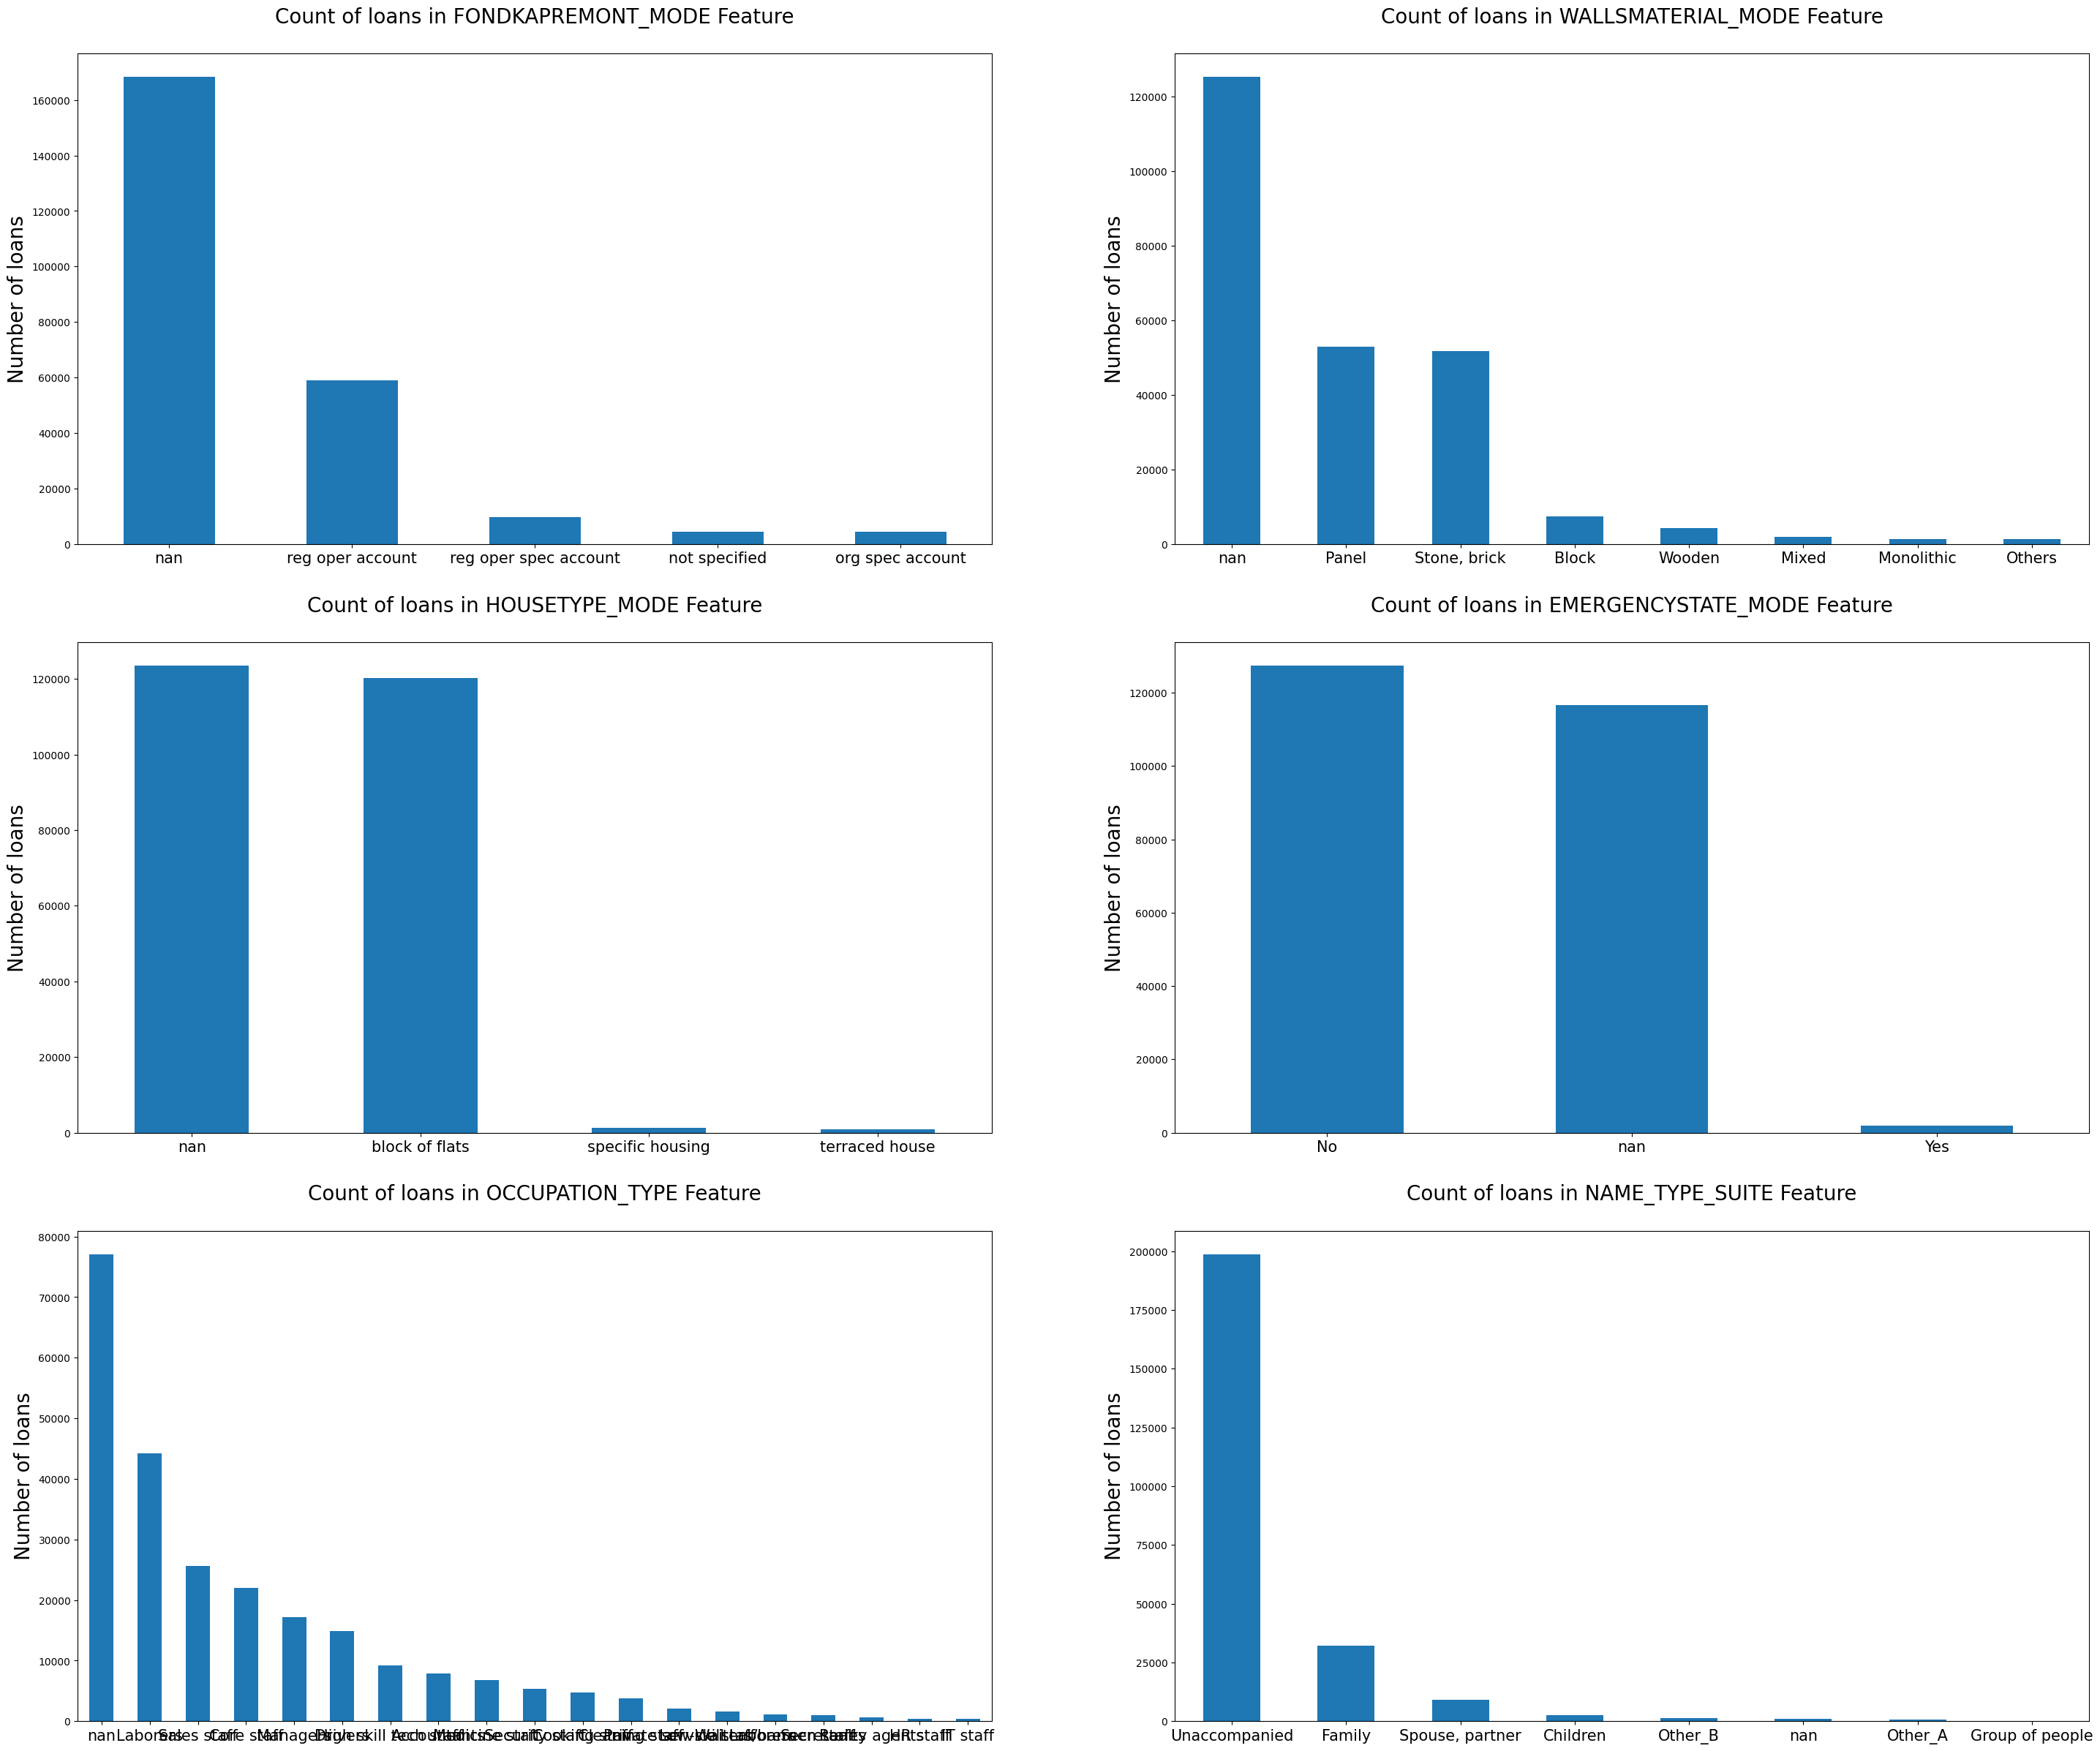

In [84]:
# Create bar charts of categories distribution in missing features
miss_feat = ['FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE']

fig, axs = plt.subplots(ncols=2, nrows= 3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(miss_feat, 1):
    plt.subplot(3, 2, i)
    data['application_train'][feature].value_counts(dropna=False).plot(kind='bar')
    
    plt.xlabel('')
    plt.xticks(rotation=0, size=15)
    plt.ylabel('Number of loans', size=20)
    plt.title('Count of loans in {} Feature'.format(feature), size=20, y=1.05)
    
plt.show()

-FONDKAPREMONT_MODE - All the NaN's values will be transfered to not specified, which seems like a interchengable definition. 
 
-WALLSMATERIAL_MODE - The NaN values would be transformed to separate category using OneHotEncoder.    

-HOUSETYPE_MODE - Looks like a redundant feature, where half are NaN values and second part are block of flats. However, the minor numbers are present in two other categories(specific housing and terraced house). Assuming that we can distribute the NaN values between other 3 categories, it would be extremely imbalanced feature with basically only one category. That one will be drop.  

-EMERGENCYSTATE_MODE - Same situation as above. This feature will be drop.    

-OCCUPATION_TYPE - Logically speaking the proffesion could have influence on the capability to repay the loan on time. It will be transformed using OneHotEncoder.    

-NAME_TYPE_SUITE - Categories Other_B and Other_A along with missing NaN values will be transformed to one Other category.

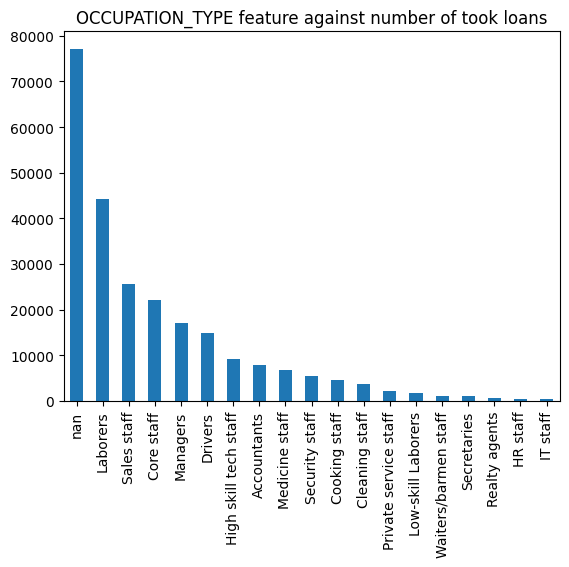

In [85]:
# Let's plot OCCUPATION_TYPE as single independent plot for better understanding
data['application_train']['OCCUPATION_TYPE'].value_counts(dropna=False).plot(kind='bar')
plt.xlabel('')
plt.title('OCCUPATION_TYPE feature against number of took loans')

plt.show()

In [86]:
# Fill NaN values in FONDKAPREMONT_MODE feature with not specified category
data['application_train']['FONDKAPREMONT_MODE'] = data['application_train']['FONDKAPREMONT_MODE'].fillna('not specified')
data['application_test']['FONDKAPREMONT_MODE'] = data['application_test']['FONDKAPREMONT_MODE'].fillna('not specified')

# Drop HOUSETYPE_MODE feature
data['application_train'] = data['application_train'].drop('HOUSETYPE_MODE', axis=1)
data['application_test'] = data['application_test'].drop('HOUSETYPE_MODE', axis=1)

# Drop EMERGENCYSTATE_MODE feature
data['application_train'] = data['application_train'].drop('EMERGENCYSTATE_MODE', axis=1)
data['application_test'] = data['application_test'].drop('EMERGENCYSTATE_MODE', axis=1)

# The NAME_TYPE_SUITE rare and NaN feature values would be mapped into 'Other' category
data['application_train']['NAME_TYPE_SUITE'] = data['application_train']['NAME_TYPE_SUITE'].fillna('Other').replace(['Other_A', 'Other_B'], 'Other')
data['application_test']['NAME_TYPE_SUITE'] = data['application_test']['NAME_TYPE_SUITE'].fillna('Other').replace(['Other_A', 'Other_B'], 'Other')

## MISSING NUMERIC FEATURES

In [87]:
numeric_features = data['application_train'].select_dtypes(include=['int64', 'float64'])
missing_numeric_features = missing_values_table(numeric_features)
print(missing_numeric_features)

Your selected dataframe has 106 columns.
There are 61 columns that have missing values.
                          Missing Values  % of Total Values
COMMONAREA_MODE                   171930               69.9
COMMONAREA_MEDI                   171930               69.9
COMMONAREA_AVG                    171930               69.9
NONLIVINGAPARTMENTS_MODE          170869               69.5
NONLIVINGAPARTMENTS_AVG           170869               69.5
...                                  ...                ...
EXT_SOURCE_2                         529                0.2
AMT_GOODS_PRICE                      224                0.1
AMT_ANNUITY                           10                0.0
DAYS_LAST_PHONE_CHANGE                 1                0.0
CNT_FAM_MEMBERS                        1                0.0

[61 rows x 2 columns]


In [88]:
# Statistical values of numerical missing features - to investige is there are any outliers that might affect imputation
data['application_train'][missing_numeric_features.index].describe()

,COMMONAREA_MODE,COMMONAREA_MEDI,COMMONAREA_AVG,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,FLOORSMIN_MEDI,...,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS
count,74079.000000,74079.000000,74079.000000,75140.000000,75140.000000,75140.000000,77812.000000,77812.000000,77812.000000,79054.000000,...,212798.000000,245204.000000,245204.000000,245204.000000,245204.000000,2.454800e+05,2.457850e+05,245999.000000,246008.000000,246008.000000
mean,0.042453,0.044492,0.044533,0.008141,0.008882,0.008709,0.101974,0.100839,0.105644,0.231809,...,1.901127,1.404789,0.100113,0.143154,1.421837,5.143854e-01,5.389827e+05,27120.238129,-962.677661,2.152637
std,0.073865,0.075565,0.075514,0.046882,0.048397,0.047982,0.093841,0.092884,0.097964,0.161984,...,1.870269,2.394177,0.363496,0.447389,2.415515,1.910533e-01,3.700520e+05,14510.634712,827.635513,0.908735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,4.050000e+04,1615.500000,-4292.000000,1.000000
25%,0.007300,0.007900,0.007900,0.000000,0.000000,0.000000,0.051300,0.050400,0.054200,0.083300,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.922228e-01,2.385000e+05,16506.000000,-1570.000000,2.000000
50%,0.019000,0.020800,0.021100,0.000000,0.000000,0.000000,0.076100,0.075600,0.077100,0.208300,...,1.000000,0.000000,0.000000,0.000000,0.000000,5.658916e-01,4.500000e+05,24903.000000,-756.000000,2.000000
75%,0.049000,0.051400,0.051600,0.003900,0.003900,0.003900,0.123100,0.121000,0.131300,0.375000,...,3.000000,2.000000,0.000000,0.000000,2.000000,6.637452e-01,6.795000e+05,34654.500000,-273.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,25.000000,344.000000,24.000000,34.000000,348.000000,8.549997e-01,4.050000e+06,258025.500000,0.000000,20.000000


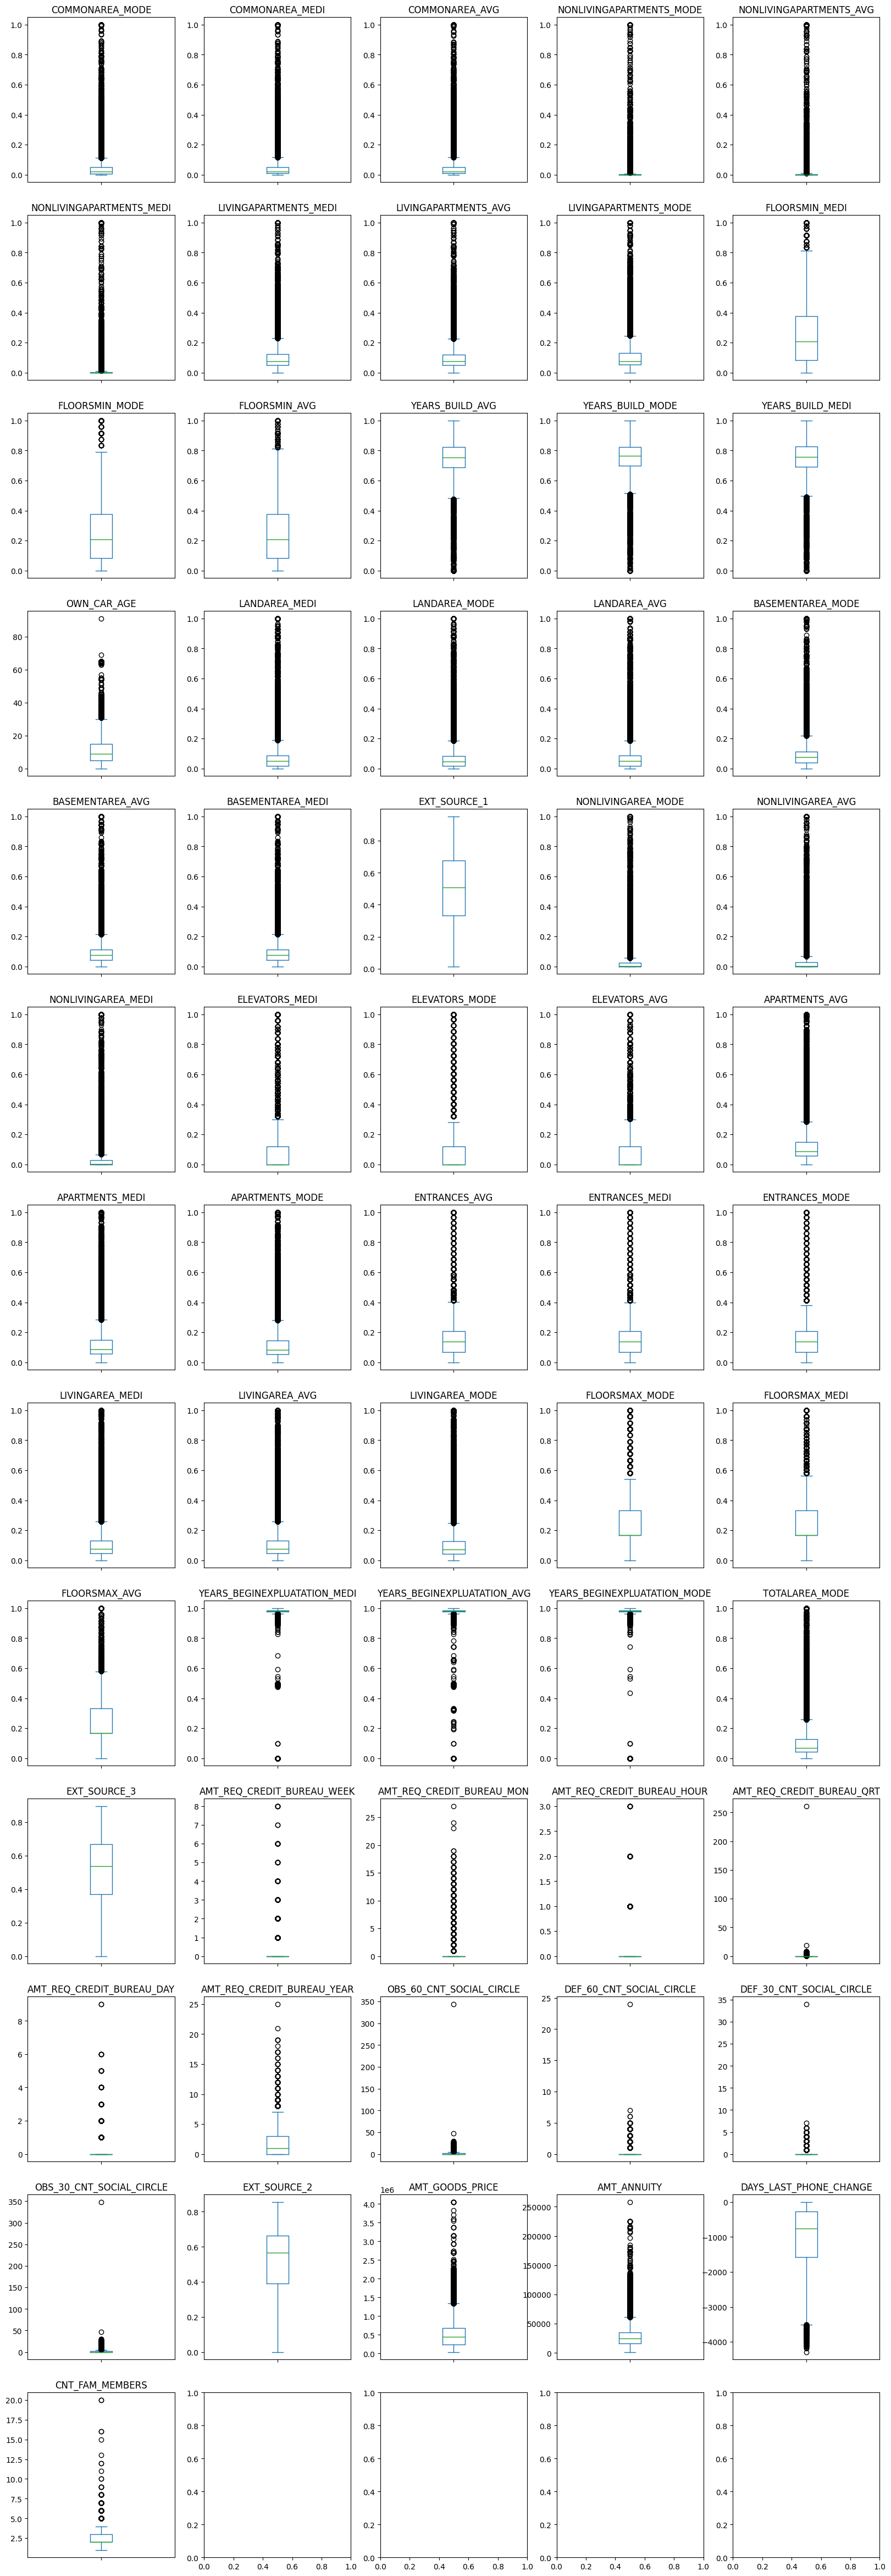

In [89]:
# Let's see the boxplots of all missing numerical values
fig, axs = plt.subplots(nrows=13, ncols=5, figsize=(20, 60))
axs = axs.flatten()

for i, feature in enumerate(missing_numeric_features.index):
    ax = axs[i]
    data['application_train'][feature].plot(kind='box', ax=ax)
    ax.set_title(feature)
    ax.set_xticklabels([])
    
plt.show()

In [90]:
# OBS_30_CNT_SOCIAL_CIRCLE train - 348; test - 353, 354, 352
data['application_train'].loc[data['application_train']['OBS_30_CNT_SOCIAL_CIRCLE'] > 300, 'OBS_30_CNT_SOCIAL_CIRCLE'] = data['application_train']['OBS_30_CNT_SOCIAL_CIRCLE'].median()
data['application_test'].loc[data['application_test']['OBS_30_CNT_SOCIAL_CIRCLE'] > 300, 'OBS_30_CNT_SOCIAL_CIRCLE'] = data['application_test']['OBS_30_CNT_SOCIAL_CIRCLE'].median()

# OBS_60_CNT_SOCIAL_CIRCLE train - 344; test - 349, 351
data['application_train'].loc[data['application_train']['OBS_60_CNT_SOCIAL_CIRCLE'] > 300, 'OBS_60_CNT_SOCIAL_CIRCLE'] = data['application_train']['OBS_60_CNT_SOCIAL_CIRCLE'].median()
data['application_test'].loc[data['application_test']['OBS_60_CNT_SOCIAL_CIRCLE'] > 300, 'OBS_60_CNT_SOCIAL_CIRCLE'] = data['application_test']['OBS_60_CNT_SOCIAL_CIRCLE'].median()

# DEF_30_CNT_SOCIAL_CIRCLE train - 34; test - 34
data['application_train'].loc[data['application_train']['DEF_30_CNT_SOCIAL_CIRCLE'] > 30, 'DEF_30_CNT_SOCIAL_CIRCLE'] = data['application_train']['DEF_30_CNT_SOCIAL_CIRCLE'].median()
data['application_test'].loc[data['application_test']['DEF_30_CNT_SOCIAL_CIRCLE'] > 30, 'DEF_30_CNT_SOCIAL_CIRCLE'] = data['application_test']['DEF_30_CNT_SOCIAL_CIRCLE'].median()

# DEF_60_CNT_SOCIAL_CIRCLE train - 24; test - 24
data['application_train'].loc[data['application_train']['DEF_60_CNT_SOCIAL_CIRCLE'] > 20, 'DEF_60_CNT_SOCIAL_CIRCLE'] = data['application_train']['DEF_60_CNT_SOCIAL_CIRCLE'].median()
data['application_test'].loc[data['application_test']['DEF_60_CNT_SOCIAL_CIRCLE'] > 20, 'DEF_60_CNT_SOCIAL_CIRCLE'] = data['application_test']['DEF_60_CNT_SOCIAL_CIRCLE'].median()

# AMT_REQ_CREDIT_BUREAU_QRT train - 261; test - null
data['application_train'].loc[data['application_train']['AMT_REQ_CREDIT_BUREAU_QRT'] > 200, 'AMT_REQ_CREDIT_BUREAU_QRT'] = data['application_train']['AMT_REQ_CREDIT_BUREAU_QRT'].median()

## EXAMINING UNIQUE VALUE - ANOMALIES

### Application_{train|test}

In [91]:
def unique_values_table(df):
    columns = []
    columns_nunique = []
    columns_unique_values = []
    # Number of Unique values
    for col in df:
        columns.append(col) 
        columns_nunique.append(df[col].nunique())
    
    # Unique values
    for each in df.columns:
        columns_unique_values.append(df[each].unique())

    # Make df contains information
    unique_table = pd.DataFrame(list(zip(columns_nunique, columns_unique_values)),
              columns=['number of unique values', 'unique values'], index = columns)
    
    return unique_table
    

In [92]:
unique_values_table(data['application_train'])

,number of unique values,unique values
TARGET,2,"[0, 1]"
NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
CODE_GENDER,3,"[F, M, XNA]"
FLAG_OWN_CAR,2,"[N, Y]"
FLAG_OWN_REALTY,2,"[N, Y]"
...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,9,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,23,"[0.0, nan, 1.0, 2.0, 5.0, 6.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,10,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 7.0, ..."
AMT_REQ_CREDIT_BUREAU_YEAR,22,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 5.0, 8.0, 6.0, ..."


In [93]:
data['application_train']['NAME_FAMILY_STATUS'].unique()

array(['Married', 'Civil marriage', 'Single / not married', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [94]:

data['application_train']['NAME_FAMILY_STATUS'].replace('Unknown', np.nan, inplace= True)
data['application_test']['NAME_FAMILY_STATUS'].replace('Unknown', np.nan, inplace= True)

In [95]:
data['application_train']['ORGANIZATION_TYPE'] = data['application_train']['ORGANIZATION_TYPE'].replace({'XNA': ['']})
data['application_test']['ORGANIZATION_TYPE'] = data['application_test']['ORGANIZATION_TYPE'].replace({'XNA': ['Other']})

In [96]:
data['application_train']['ORGANIZATION_TYPE'].unique()

array(['School', 'Business Entity Type 3', 'Religion', 'Other', '',
       'Electricity', 'Medicine', 'Self-employed', 'Transport: type 2',
       'Business Entity Type 2', 'Construction', 'Housing',
       'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Military',
       'Services', 'Security Ministries', 'Transport: type 4',
       'Government', 'Emergency', 'Security', 'Trade: type 2',
       'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Culture', 'Hotel', 'Industry: type 7',
       'Trade: type 3', 'Industry: type 3', 'Bank', 'Industry: type 9',
       'Restaurant', 'Insurance', 'Trade: type 6', 'Transport: type 1',
       'Industry: type 12', 'Industry: type 1', 'Industry: type 2',
       'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'Industry: type

In [97]:
XNA_count = (data['application_train']['ORGANIZATION_TYPE'] == 'XNA').sum()
print(f"Number of 'XNA' value in 'ORGANIZATION_TYPE'': {XNA_count}")

Number of 'XNA' value in 'ORGANIZATION_TYPE'': 0


In [98]:
data['application_train']['ORGANIZATION_TYPE'] = data['application_train']['ORGANIZATION_TYPE'].replace({'XNA': ['Other']})
data['application_test']['ORGANIZATION_TYPE'] = data['application_test']['ORGANIZATION_TYPE'].replace({'XNA': ['Other']})

In [99]:
display(data['application_train']['CODE_GENDER'].describe())

count     246009
unique         3
top            F
freq      161856
Name: CODE_GENDER, dtype: object

In [100]:

data['application_train']['CODE_GENDER'] = data['application_train']['CODE_GENDER'].replace({'XNA': ['Other']})
data['application_test']['CODE_GENDER'] = data['application_test']['CODE_GENDER'].replace({'XNA': ['Other']})

In [101]:
display(data['application_train']['OWN_CAR_AGE'].describe())

count    83821.000000
mean        12.042293
std         11.914722
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         91.000000
Name: OWN_CAR_AGE, dtype: float64

In [102]:
# max value was 91 which is not reasonable. Hence replace with NaN
data['application_train']['OWN_CAR_AGE'].replace(91, np.nan, inplace= True)
data['application_test']['OWN_CAR_AGE'].replace(91, np.nan, inplace= True)

In [103]:
display(data['application_train']['DAYS_EMPLOYED'].describe())
display(data['application_test']['DAYS_EMPLOYED'].describe())

count    246009.000000
mean      63852.612441
std      141306.376949
min      -17912.000000
25%       -2758.000000
50%       -1212.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

count     61502.000000
mean      63664.779145
std      141154.306001
min      -17522.000000
25%       -2768.000000
50%       -1218.000000
75%        -292.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### We see that 365243 is the max employed day which is not possible so replace with NaN

In [104]:
# # max value was 365243 which is not possible. Hence replace with NaN
data['application_train']['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
data['application_test']['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

In [105]:
unique_values_table(data['previous_application'])

,number of unique values,unique values
SK_ID_PREV,1413701,"[2030495, 1696966, 2154916, 2802425, 1536272, ..."
NAME_CONTRACT_TYPE,4,"[Consumer loans, Cash loans, Revolving loans, ..."
AMT_ANNUITY,329537,"[1730.43, 68258.655, 12417.39, 25188.615, 2170..."
AMT_APPLICATION,86766,"[17145.0, 1800000.0, 108400.5, 607500.0, 45000..."
AMT_CREDIT,81730,"[17145.0, 1754721.0, 119848.5, 679671.0, 51237..."
AMT_DOWN_PAYMENT,26863,"[0.0, 180000.0, nan, 24750.0, 9571.5, 10525.95..."
AMT_GOODS_PRICE,86766,"[17145.0, 1800000.0, 108400.5, 607500.0, 45000..."
WEEKDAY_APPR_PROCESS_START,7,"[SATURDAY, SUNDAY, THURSDAY, WEDNESDAY, TUESDA..."
HOUR_APPR_PROCESS_START,24,"[15, 18, 14, 11, 9, 13, 10, 7, 8, 6, 12, 16, 1..."
FLAG_LAST_APPL_PER_CONTRACT,2,"[Y, N]"


In [106]:
# Check the columns for reasonable values
print(data['previous_application']['DAYS_FIRST_DRAWING'].describe())
print(data['previous_application']['DAYS_FIRST_DUE'].describe())
print(data['previous_application']['DAYS_LAST_DUE_1ST_VERSION'].describe())
print(data['previous_application']['DAYS_LAST_DUE'].describe())
print(data['previous_application']['DAYS_TERMINATION'].describe())

count    852595.000000
mean     342257.656710
std       88832.266598
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64
count    852595.000000
mean      13488.741567
std       71650.147146
min       -2892.000000
25%       -1630.000000
50%        -825.000000
75%        -408.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64
count    852595.000000
mean      33274.831806
std      106161.775933
min       -2801.000000
25%       -1244.000000
50%        -358.000000
75%         135.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64
count    852595.000000
mean      76665.634755
std      149704.716371
min       -2889.000000
25%       -1316.000000
50%        -534.000000
75%         -73.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64
count    852595.000000
mean      82353.171672
std      153537.064274
min       -2874.000000
25%       

In [107]:
data['previous_application']['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
data['previous_application']['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
data['previous_application']['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
data['previous_application']['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
data['previous_application']['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

In [108]:
#there are a lot of unusual value such as XAP, XNA, combing with the two given unusual value such as Unknown and 365243, we will assign NaN for the same remaining values in all table
for key in data.keys():
    data[key].replace(['XNA', 'XAP', 'Unknown', 365243], np.nan, inplace= True)

# FILLNA CÒN LẠI

In [109]:
# Function to check the percentage of missing values
def check_missing_percentage(df):
    missing_percentage = 100 * df.isnull().sum() / len(df)
    missing_columns = missing_percentage[missing_percentage > 0].sort_values(ascending=False) 
    return missing_columns

# Check missing percentage for each dataset
for key in data.keys():
    print(f"\nMissing value percentages in {key}:")
    missing_percentage = check_missing_percentage(data[key])
    print(missing_percentage)


Missing value percentages in application_train:
COMMONAREA_AVG              69.887687
COMMONAREA_MEDI             69.887687
COMMONAREA_MODE             69.887687
NONLIVINGAPARTMENTS_MEDI    69.456402
NONLIVINGAPARTMENTS_MODE    69.456402
                              ...    
AMT_GOODS_PRICE              0.091054
AMT_ANNUITY                  0.004065
DAYS_LAST_PHONE_CHANGE       0.000406
CNT_FAM_MEMBERS              0.000406
NAME_FAMILY_STATUS           0.000406
Length: 65, dtype: float64

Missing value percentages in application_test:
COMMONAREA_AVG              69.810738
COMMONAREA_MEDI             69.810738
COMMONAREA_MODE             69.810738
NONLIVINGAPARTMENTS_MEDI    69.339208
NONLIVINGAPARTMENTS_MODE    69.339208
                              ...    
EXT_SOURCE_2                 0.213001
AMT_GOODS_PRICE              0.087802
AMT_ANNUITY                  0.003252
CNT_FAM_MEMBERS              0.001626
NAME_FAMILY_STATUS           0.001626
Length: 64, dtype: float64

Missing valu

AMT_ANNUITY               77.116885
AMT_CREDIT_MAX_OVERDUE    64.732738
DAYS_ENDDATE_FACT         37.170798
AMT_CREDIT_SUM_LIMIT      33.417160
AMT_CREDIT_SUM_DEBT       15.224882
DAYS_CREDIT_ENDDATE        6.080426
AMT_CREDIT_SUM             0.000205
dtype: float64

Missing value percentages in bureau_balance:
Series([], dtype: float64)

Missing value percentages in previous_application:
RATE_INTEREST_PRIMARY        99.661102
RATE_INTEREST_PRIVILEGED     99.661102
DAYS_FIRST_DRAWING           96.215536
NAME_CASH_LOAN_PURPOSE       95.797343
CODE_REJECT_REASON           81.340467
NAME_PRODUCT_TYPE            63.666433
NAME_GOODS_CATEGORY          56.391627
DAYS_TERMINATION             53.413416
AMT_DOWN_PAYMENT             53.019698
RATE_DOWN_PAYMENT            53.019698
DAYS_LAST_DUE                52.479131
NAME_SELLER_INDUSTRY         50.599243
NAME_TYPE_SUITE              49.138538
DAYS_LAST_DUE_1ST_VERSION    45.285743
DAYS_FIRST_DUE               42.092918
NFLAG_INSURED_ON_APPROV

In [110]:
# Function to handle missing values
def impute_cols_with_nas(df):
    # Impute missing values for numerical columns with the median
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)
        
    # Impute missing values for categorical columns with the mode
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Impute columns with NAs for each dataset
for key in data.keys():
    impute_cols_with_nas(data[key])

## Encoding all datasets
    

In [111]:
# Function to encode categorical columns and print shapes
def encode_categorical_features(df, dataset_name):

    # Get the shape before encoding
    initial_shape = df.shape
    
    # Get the categorical columns (type object)
    cat_cols = df.select_dtypes(include=['object']).columns
    le = LabelEncoder()

    print(f"\nInitial shape: {initial_shape}")
    print(f"Found {len(cat_cols)} categorical columns to encode: {list(cat_cols)}")
    
    for col in cat_cols:
        # If column has only two unique values, apply Label Encoding
        if df[col].nunique() == 2:
            df[col] = le.fit_transform(df[col])
            print(f"Label Encoding applied to column: {col}")
        else:
            # Apply One-Hot Encoding for multi-category columns
            df = pd.get_dummies(df, columns=[col], drop_first=True)
            print(f"One-Hot Encoding applied to column: {col}")
    
    # Convert any Boolean columns to integers (0 and 1)
    for col in df.select_dtypes(include=[bool]).columns:
        df[col] = df[col].astype(int)
        
    # Get the shape after encoding
    final_shape = df.shape
    print(f"Final shape after encoding: {final_shape}")
    
    return df

# Apply encoding to all datasets
for key in data.keys():
    print(f"\nProcessing {key} dataset...")
    data[key] = encode_categorical_features(data[key], key)
    print(f"Processed {key} dataset. Final shape: {data[key].shape}")


Processing application_train dataset...

Initial shape: (246009, 120)
Found 14 categorical columns to encode: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE']
Label Encoding applied to column: NAME_CONTRACT_TYPE
One-Hot Encoding applied to column: CODE_GENDER
Label Encoding applied to column: FLAG_OWN_CAR
Label Encoding applied to column: FLAG_OWN_REALTY
One-Hot Encoding applied to column: NAME_TYPE_SUITE
One-Hot Encoding applied to column: NAME_INCOME_TYPE
One-Hot Encoding applied to column: NAME_EDUCATION_TYPE


One-Hot Encoding applied to column: NAME_FAMILY_STATUS
One-Hot Encoding applied to column: NAME_HOUSING_TYPE
One-Hot Encoding applied to column: OCCUPATION_TYPE
One-Hot Encoding applied to column: WEEKDAY_APPR_PROCESS_START
One-Hot Encoding applied to column: ORGANIZATION_TYPE
One-Hot Encoding applied to column: FONDKAPREMONT_MODE
One-Hot Encoding applied to column: WALLSMATERIAL_MODE
Final shape after encoding: (246009, 225)
Processed application_train dataset. Final shape: (246009, 225)

Processing application_test dataset...

Initial shape: (61502, 119)
Found 14 categorical columns to encode: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE']
Label Encoding applied to column: NAME_CONTRACT_TYPE
One-Hot Encoding applied to column: CODE_GENDER
Labe

In [112]:
print(data['application_train'].shape)
print(data['application_test'].shape)

(246009, 225)
(61502, 223)


# FEATURE ENGINEERING

In [113]:
##Polynomial Features
poly_features = data['application_train'][['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = data['application_test'][['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

                                  
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

poly_features = pd.DataFrame(poly_features,columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

data['application_train'] = pd.concat([data['application_train'], poly_features], axis=1)
data['application_train'] = data['application_train'].loc[:,~data['application_train'].columns.duplicated()].copy()
data['application_test'] = pd.concat([data['application_test'], poly_features_test], axis=1)
data['application_test'] = data['application_test'].loc[:,~data['application_test'].columns.duplicated()].copy()

##Domain Features
data['application_train']['CREDIT_INCOME_PERCENT'] = data['application_train']['AMT_CREDIT'] / data['application_train']['AMT_INCOME_TOTAL']
data['application_train']['ANNUITY_INCOME_PERCENT'] = data['application_train']['AMT_ANNUITY'] / data['application_train']['AMT_INCOME_TOTAL']
data['application_train']['CREDIT_TERM'] = data['application_train']['AMT_ANNUITY'] / data['application_train']['AMT_CREDIT']
data['application_train']['DAYS_EMPLOYED_PERCENT'] = data['application_train']['DAYS_EMPLOYED'] / data['application_train']['DAYS_BIRTH']
data['application_train']['INCOME_PER_PERSON'] = data['application_train']['AMT_INCOME_TOTAL'] / data['application_train']['CNT_FAM_MEMBERS']
data['application_train']['CNT_ADULT_FAM_MEMBER'] = data['application_train']['CNT_FAM_MEMBERS'] - data['application_train']['CNT_CHILDREN']
data['application_train']['RATIO_CHILDREN_TO_ADULTS'] = data['application_train']['CNT_CHILDREN'] / data['application_train']['CNT_ADULT_FAM_MEMBER']
data['application_train']['RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS'] = data['application_train']['AMT_CREDIT'] / data['application_train']['CNT_FAM_MEMBERS']
data['application_train']['RATIO_AMT_CREDIT_TO_CNT_ADULT_FAM_MEMBER'] = data['application_train']['AMT_CREDIT'] / data['application_train']['CNT_ADULT_FAM_MEMBER']
data['application_train']['AMT_INCOME_TOTAL_PER_ADULT_FAM_MEMBER'] = data['application_train']['AMT_INCOME_TOTAL'] / data['application_train']['CNT_ADULT_FAM_MEMBER']



data['application_test']['CREDIT_INCOME_PERCENT'] = data['application_test']['AMT_CREDIT'] / data['application_test']['AMT_INCOME_TOTAL']
data['application_test']['ANNUITY_INCOME_PERCENT'] = data['application_test']['AMT_ANNUITY'] / data['application_test']['AMT_INCOME_TOTAL']
data['application_test']['CREDIT_TERM'] = data['application_test']['AMT_ANNUITY'] / data['application_test']['AMT_CREDIT']
data['application_test']['DAYS_EMPLOYED_PERCENT'] = data['application_test']['DAYS_EMPLOYED'] / data['application_test']['DAYS_BIRTH']
data['application_test']['INCOME_PER_PERSON'] = data['application_test']['AMT_INCOME_TOTAL'] / data['application_test']['CNT_FAM_MEMBERS']
data['application_test']['CNT_ADULT_FAM_MEMBER'] = data['application_test']['CNT_FAM_MEMBERS'] - data['application_test']['CNT_CHILDREN']
data['application_test']['RATIO_CHILDREN_TO_ADULTS'] = data['application_test']['CNT_CHILDREN'] / data['application_test']['CNT_ADULT_FAM_MEMBER']
data['application_test']['RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS'] = data['application_test']['AMT_CREDIT'] / data['application_test']['CNT_FAM_MEMBERS']
data['application_test']['RATIO_AMT_CREDIT_TO_CNT_ADULT_FAM_MEMBER'] = data['application_test']['AMT_CREDIT'] / data['application_test']['CNT_ADULT_FAM_MEMBER']
data['application_test']['AMT_INCOME_TOTAL_PER_ADULT_FAM_MEMBER'] = data['application_test']['AMT_INCOME_TOTAL'] / data['application_test']['CNT_ADULT_FAM_MEMBER']


## Binning and WoE function

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Define a manual binning and WoE function
def binning_and_woe_manual(df, feature, target, bins, labels=None):
    """
    Apply manual binning and calculate WoE for a given feature.
    Args:
        df (DataFrame): Input DataFrame.
        feature (str): Feature column to bin.
        target (str): Target column.
        bins (list): Bin edges for manual binning.
        labels (list): Labels for bins (optional).
    Returns:
        DataFrame: Updated DataFrame with WoE-transformed column.
    """
    # Manual Binning
    binned_col = f"{feature}_binned"
    df[binned_col] = pd.cut(df[feature], bins=bins, labels=labels, include_lowest=True)

    # Calculate WoE
    woe_df = df.groupby(binned_col)[target].agg(['count', 'sum']).reset_index()
    woe_df['non_event'] = woe_df['count'] - woe_df['sum']
    woe_df['event_rate'] = woe_df['sum'] / max(woe_df['sum'].sum(), 1)
    woe_df['non_event_rate'] = woe_df['non_event'] / max(woe_df['non_event'].sum(), 1)
    woe_df['woe'] = np.log((woe_df['event_rate'] + 1e-6) / (woe_df['non_event_rate'] + 1e-6))  # Avoid division by zero

    # Map WoE back to the DataFrame
    woe_col = f"{feature}_woe"
    woe_mapping = dict(zip(woe_df[binned_col], woe_df['woe']))
    df[woe_col] = df[binned_col].map(woe_mapping)

    # Drop the intermediate binned column
    df.drop(columns=[binned_col], inplace=True)

    return df, woe_df

# Example: Define manual bins for each feature
manual_bins = {
    'AMT_INCOME_TOTAL': [0, 50000, 100000, 200000, 500000, np.inf],
    'DAYS_BIRTH': [-np.inf, -25000, -20000, -15000, -10000, 0]
}

# Manually apply binning and WoE for each feature
woe_tables = {}  # To store WoE tables for inspection
for feature, bins in manual_bins.items():
    data['application_train'], woe_table = binning_and_woe_manual(data['application_train'], feature, 'TARGET', bins)
    woe_tables[feature] = woe_table  # Save WoE table for reference

# Inspect WoE tables for each feature
for feature, woe_table in woe_tables.items():
    print(f"WoE Table for {feature}:")
    print(woe_table)
    print("\n")

# Re-define numerical_cols before updating
numerical_cols = data['application_train'].select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in manual_bins.keys()] + [f"{feature}_woe" for feature in manual_bins.keys()]

# Update the pipeline with transformed numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale features
])

categorical_cols = data['application_train'].select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

WoE Table for AMT_INCOME_TOTAL:
  AMT_INCOME_TOTAL_binned   count    sum  non_event  event_rate  \
0       (-0.001, 50000.0]    3595    276       3319    0.013886   
1     (50000.0, 100000.0]   47354   3906      43448    0.196518   
2    (100000.0, 200000.0]  124656  10670     113986    0.536828   
3    (200000.0, 500000.0]   68204   4900      63304    0.246528   
4         (500000.0, inf]    2200    124       2076    0.006239   

   non_event_rate       woe  
0        0.014677 -0.055404  
1        0.192135  0.022559  
2        0.504066  0.062971  
3        0.279941 -0.127102  
4        0.009180 -0.386255  


WoE Table for DAYS_BIRTH:
      DAYS_BIRTH_binned  count   sum  non_event  event_rate  non_event_rate  \
0      (-inf, -25000.0]    257    10        247    0.000503        0.001092   
1  (-25000.0, -20000.0]  56033  2938      53095    0.147816        0.234795   
2  (-20000.0, -15000.0]  80371  5931      74440    0.298400        0.329187   
3  (-15000.0, -10000.0]  90183  8757     

### Categorical encoding can chage the number of features in train and test so align them so that they won't cause while model building

In [115]:
# Check if the 'TARGET' column exists in the testing dataset
if 'TARGET' not in data['application_test']:
    # If not, retrieve it from the training dataset and add it
    data['application_test']['TARGET'] = data['application_train']['TARGET']

# Apply manual WoE transformation for each feature using the same bins as training
for feature, bins in manual_bins.items():
    # Apply the same binning and WoE mapping used for training data
    data['application_test'], _ = binning_and_woe_manual(
        data['application_test'], feature, 'TARGET', bins
    )


In [116]:
train_labels = data['application_train']['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
data['application_train'], data['application_test'] = data['application_train'].align(data['application_test'], join = 'inner', axis = 1)

# Add the target back in
data['application_train']['TARGET'] = train_labels

print('Training Features shape: ', data['application_train'].shape)
print('Testing Features shape: ', data['application_test'].shape)

Training Features shape:  (246009, 267)
Testing Features shape:  (61502, 267)


In [117]:
# # Check missing percentage for each dataset
for key in data.keys():
    print(f"\nMissing value percentages in {key}:")
    missing_percentage = check_missing_percentage(data[key])
    print(missing_percentage)


Missing value percentages in application_train:
Series([], dtype: float64)

Missing value percentages in application_test:
Series([], dtype: float64)

Missing value percentages in bureau:
Series([], dtype: float64)

Missing value percentages in bureau_balance:
Series([], dtype: float64)

Missing value percentages in previous_application:
Series([], dtype: float64)

Missing value percentages in POS_CASH_balance:
Series([], dtype: float64)

Missing value percentages in installments_payments:
Series([], dtype: float64)

Missing value percentages in credit_card_balance:
Series([], dtype: float64)


In [118]:
# # Final application train and test data shapes
print(data['application_train'].shape)
print(data['application_test'].shape)

(246009, 267)
(61502, 267)


### Create training and validation data from just application_train

In [119]:
y_train = data['application_train']['TARGET']
X_train = data['application_train'].drop(columns=['TARGET', 'SK_ID_CURR'])  # Drop target and identifier

# Splitting the training data into train and validation sets
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

## Create LogisticRegression model

In [120]:
model = LogisticRegression(
    C=0.07,
    penalty='l2',
    solver='liblinear',
    max_iter=200,        # Tăng max_iter để đảm bảo hội tụ
    random_state=42       # Đảm bảo tính tái lập
)

## Scale the data and see how the models behave.

In [121]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train_split)
X_valid_scaled = scaler.transform(X_valid)

## Train Logistic Regression on application_train

In [122]:
# Train and evaluate model
model.fit(X_train_scaled, y_train_split)
y_pred_valid = model.predict_proba(X_valid_scaled)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred_valid)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.7532


###  ROC AUC: 0.7540

## Before merging, aggregate all of them and calculate mean, sum, max and min values.

In [123]:
y_train = data['application_train']['TARGET']
X_train = data['application_train'].drop(columns=['TARGET'])  # Drop target and identifier
X_test = data['application_test']  # Drop identifier from test set

In [124]:
data['bureau_balance']

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
27299920,5041336,-47,0,0,0,0,0,0,1
27299921,5041336,-48,0,0,0,0,0,0,1
27299922,5041336,-49,0,0,0,0,0,0,1
27299923,5041336,-50,0,0,0,0,0,0,1


In [125]:
bureau_balance_agg = data['bureau_balance'].groupby('SK_ID_BUREAU').agg(['mean', 'sum', 'max', 'min'])

# Step 2: Flatten the multi-level columns
bureau_balance_agg.columns = ['bureau_balance_' + '_'.join(col).strip() for col in bureau_balance_agg.columns.values]

# Step 3: Merge the aggregated bureau_balance data with the bureau data
# Use SK_ID_BUREAU as the key for merging
bureau_agg = data['bureau'].merge(bureau_balance_agg, on='SK_ID_BUREAU', how='left')

In [126]:
bureau_agg.drop(columns = 'SK_ID_BUREAU', inplace = True)
#data['bureau_balance'].drop(columns = 'SK_ID_BUREAU', inplace = True)
data['previous_application'].drop(columns = 'SK_ID_PREV', inplace = True)
data['POS_CASH_balance'].drop(columns = 'SK_ID_PREV', inplace = True)
data['installments_payments'].drop(columns = 'SK_ID_PREV', inplace = True)
data['credit_card_balance'].drop(columns = 'SK_ID_PREV', inplace = True)

In [127]:
# Aggregate bureau data
bureau_agg = bureau_agg.groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns.values]

# Aggregate previous_application data
previous_app_agg = data['previous_application'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])
previous_app_agg.columns = ['_'.join(col).strip() for col in previous_app_agg.columns.values]

# Aggregate credit_card_balance data
credit_card_agg = data['credit_card_balance'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])
credit_card_agg.columns = ['_'.join(col).strip() for col in credit_card_agg.columns.values]

# Aggregate POS_CASH_balance data
pos_cash_agg = data['POS_CASH_balance'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])
pos_cash_agg.columns = ['_'.join(col).strip() for col in pos_cash_agg.columns.values]

# Aggregate installments_payments data
installments_agg = data['installments_payments'].groupby('SK_ID_CURR').agg(['mean', 'sum', 'max', 'min'])
installments_agg.columns = ['installments_' + '_'.join(col).strip() for col in installments_agg.columns.values]

In [128]:
# Merge aggregated features into the application_train dataset
application_train = X_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(previous_app_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(credit_card_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(pos_cash_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(installments_agg, on='SK_ID_CURR', how='left')

# For application_test, we do similar merging
application_test = X_test.merge(bureau_agg, on='SK_ID_CURR', how='left')
application_test = application_test.merge(previous_app_agg, on='SK_ID_CURR', how='left')
application_test = application_test.merge(credit_card_agg, on='SK_ID_CURR', how='left')
application_test = application_test.merge(pos_cash_agg, on='SK_ID_CURR', how='left')
application_test = application_test.merge(installments_agg, on='SK_ID_CURR', how='left')

### Fill missing values

In [129]:
# Impute columns with NAs for each dataset
impute_cols_with_nas(application_train)
impute_cols_with_nas(application_test)

### Create final application train and test data

In [130]:
application_train_data = application_train.drop(columns=['SK_ID_CURR'])
application_test_data = application_test.drop(columns=['SK_ID_CURR'])

In [131]:
del application_train
gc.collect()

1050

### Create train and validation data from final application_train_data. This data contains informations from other datasets as well

In [132]:
# Splitting the training data into train and validation sets
X_train_split, X_valid, y_train_split, y_valid = train_test_split(application_train_data, y_train, test_size=0.2, random_state=42, stratify=y_train)

### Scale the splitted train and validation data

In [133]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train_split)
X_valid_scaled = scaler.transform(X_valid)

### Train the models on the train data(containing info from other datasets as well) and test using the validation data

In [134]:
# Train and evaluate models
model.fit(X_train_scaled, y_train_split)
y_pred_valid = model.predict_proba(X_valid_scaled)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred_valid)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.7691


## ROC AUC 0.7721

### Create scaled train and test data for final submission

In [142]:

application_test_data = application_test_data.drop(columns=['TARGET'])



In [143]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(application_train_data)
X_test_scaled = scaler.transform(application_test_data)

In [ ]:
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict_proba(X_test_scaled)[:, 1]
submission = pd.DataFrame({'SK_ID_CURR': application_test['SK_ID_CURR'], 'TARGET': y_test_pred})

In [ ]:
submission.head()

In [ ]:
submission.to_csv("submission123.csv", index=False)